In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
from IPython.display import HTML, Latex, Math

In [30]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 8</span>

### Variational MonteCarlo

Il metodo MonteCarlo variazionale è un metodo utilizzato nello studio di sistemi quantistici a molti corpi e sfrutta l'applicazione del principio variazionale per lo studio di valori d'aspettazione di osservabili di ground-state per sistemi a molti corpi.

Per il _**principio variazionale**_, data una funzione d'onda tentativo $\psi(\vec{r_1}...\vec{r_N})_{Trial}$, l'energia variazionale associata ad essa $E_{T}$ denota un limite superiore all'energia di ground state $E_0$:

$$E_T = \frac{\langle \psi_T|\hat{H}|\psi_T \rangle}{\langle \psi_T|\psi_T \rangle} \geq E_0 = \frac{\langle \psi_0|\hat{H}|\psi_0 \rangle}{\langle \psi_0|\psi_0 \rangle}$$

dove $\psi_0$ è la funzione d'onda relativa al ground-state e $\hat{H}$ l'hamiltoniana del sistema.
 Il minimo di $E_T$ si avrà allora quando $\psi_T = \psi_0$. L'obiettivo dunque è generare una famiglia di funzioni d'onda $\psi_T(\vec{r},\vec{a})$ dipendente da dei parametri $\vec{a}$: ottimizzando il vettore di parametri si otterrà che per un certo $\vec{a\ast}$ l'energia $E_T$ è minimizzata e la funzione tentativo è una buona approssimazione della funzione d'onda di ground-state.
 
 Scrivendo il principio variazionale come:
 
 $$E_T = \int d\vec{r_1}...d\vec{r_N} \frac{|\psi_T(\vec{r_1}...\vec{r_N})|^2}{\int d\vec{r_1}...d\vec{r_N}|\psi_T(\vec{r_1}...\vec{r_N})|^2} \frac{\hat{H}\psi_T(\vec{r_1}...\vec{r_N})}{\psi_T(\vec{r_1}...\vec{r_N})}$$
 
allora l'energia variazionale equivale ad
 
$$E_T = \int d\vec{r_1}...d\vec{r_N} p(\vec{r_1}...\vec{r_N}) E_{loc}(\vec{r_1}...\vec{r_N})$$
 
Si può allora utilizzare l'algoritmo di Metropolis per campionare la densità di probabilità congiunta $p(\vec{r_1}...\vec{r_N})$ ed estrarre le relative coordinate tridimensionali; esse verranno poi utilizzate per il calcolo dei valori d'aspettazione

$$\langle \hat{H} \rangle_T = \frac{1}{N} \sum_{i = 1}^N \frac{-\frac{\hbar^2}{2m}\nabla^2 \psi_T(\vec{x_{new}},\vec{a})}{\psi_T(\vec{x_{new}},\vec{a})} + V(\vec{x_{new}})$$

Ottimizzando i parametri $\vec{a}$ si potrà minimizzare $\langle \hat{H} \rangle_T$, trovando il valore d'aspettazione corrispondente al ground-state del sistema.

### Esercizio 8.01,8.02: ottimizzazione del principio variazionale

Si vuole ottimizzare il principio variazionale per un sistema a singola particella monodimensionale soggetto ad un potenziale esterno del tipo 

$$V(x) = x^4 - \frac{5}{2}x^2$$

La funzione tentativo utilizzata, pari alla somma di due gaussiane, è parametrizzata da due parametri variazionali $\vec{a}:\sigma, \mu$ dove $\sigma$ equivale alla radice quadrata dell'ampiezza delle gaussiane, mentre $\mu$ rappresenta la distanza dall'origine dei loro valor medi:

$$\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$ 
                               
Si è utilizzato l'algoritmo di Metropolis per campionare una densità di probabilità descritta dalla funzione d'onda tentativo $|\Psi_T(x)|^2$ utilizzando una probabilità di transizione uniforme $T(x_{new}|x_{old})$. 
Il valor medio dell'energia $\langle \hat{H} \rangle_T$ ottenuto è stato poi minimizzato ottimizzando i parametri $\mu,\sigma$: l'ottimizzazione è stata svolta creando una griglia di parametri con $10000$ coppie di valori $(\mu,\sigma)$. Partendo da valori di $\mu = 1$ sono stati fatti passi pari a $0,005$ fino a raggiungere il valore di $\mu = 0.5$; per ogni valore di $\mu$ analizzata è stato poi variato il parametro $\sigma$, partendo da valori $\sigma = 0.7$ fino a valori di $\sigma = 0.6$ con passi di $0,001$. Confrontando le energie ottenute tramite algoritmo di Metropolis si sono trovati i valori di $\sigma_{min}, \mu_{min}$ relativi all'energia minima trovata:
- $\mu_{min} = 0,815$
- $\sigma_{min} = 0,631$

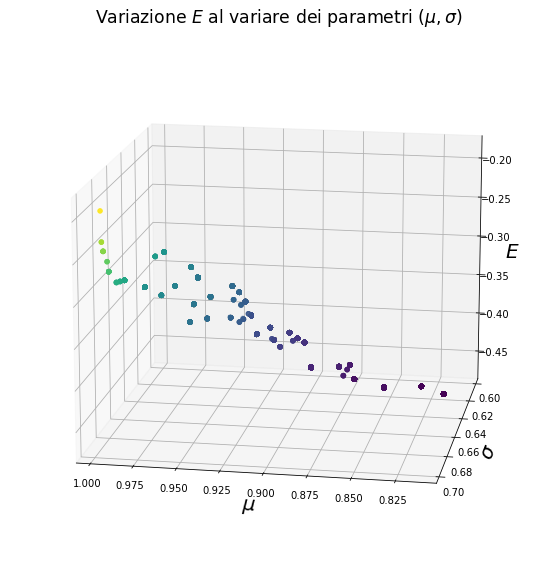

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ene, mu, sigma = np.loadtxt("out_min.dat", usecols=(0,1,2), unpack = True)

ax.scatter3D(mu, sigma, ene, c=ene, cmap='viridis')
ax.set_xlabel("$\mu$", fontsize = 20)
ax.set_ylabel("$\sigma$", fontsize = 20)
ax.set_zlabel("$E$", fontsize = 20)
ax.set_title("Variazione $E$ al variare dei parametri $(\mu, \sigma)$", fontsize = "xx-large")
ax.view_init(15, 100)

plt.show()

I valori trovati nell'ottimizzazione sono stati poi utilizzati durante la fase di blocking per il calcolo dei valor medi dell'energia e della relativa incertezza statistica: si sono suddivisi i $10^6$ passi MonteCarlo totali in $10^2$ blocchi e si sono ritrovati i seguenti risultati:

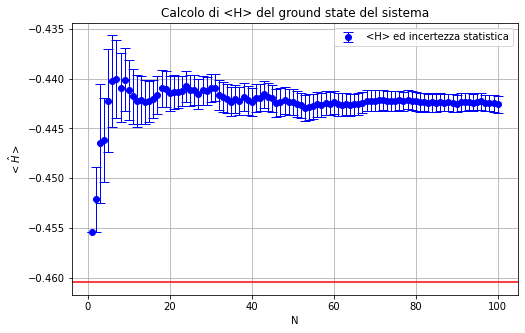

In [37]:
plt.figure(figsize=(8,5))

M, mean_ene, std = np.loadtxt("mean_ene.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(M, mean_ene, yerr=std, label = "<H> ed incertezza statistica", fmt = "bo", capsize = 5, elinewidth = 1)

plt.axhline(y=-0.46046587969271535,color="red")
plt.title("Calcolo di <H> del ground state del sistema")
plt.ylabel("$<\hat{H}>$")
plt.xlabel("N")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Come si può notare dal plot il valor medio dell'energia di ground-state si attesta attorno ad un valore pari a circa $E_0 \simeq -0,442594$. Il valore esatto dell'energia di ground-state per il potenziale considerato si può trovare generando un reticolo di punti discreti, in cui la funzione d'onda, che ha un valore diverso in ogni punto del reticolo, può essere descritta tramite un _vettore_ 

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

L'equazione di Schrodinger 
$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

può essere allora scritta in forma matriciale. Le energie dei diversi stati corrisponderanno agli autovalori della matrice, mentre le funzioni d'onda $\Psi_1...\Psi_N$ sono i corrispettivi autovettori. In questo modo si trova il valore numerico dell'energia di ground-state, pari a

$$E_0 = -0,46046587969271535$$

La differenza che vi è con il risultato numerico ottenuto nella simulazione è dovuta al fatto di aver utilizzato un principio variazionale, per il quale il valore dell'energia trovato è soltanto una buona approssimazione dell'energia di ground-state effettiva.

Viene riportato inoltre l'istogramma della densità di probabilità relativa alle coordinate $x_{new}$ campionate grazie all'algoritmo di Metropolis. Essa, che equivale alla $|\Psi(x)_{Trial}|^2$, viene confrontata con le densità di probabilità trovate tramite la scrittura dell'equazione di Schrodinger in forma matriciale e tramite la soluzione analitica, trovata normalizzando la $\Psi_T^{\sigma,\mu}(x)$:

$$\Psi_T^{\sigma,\mu}(x) = \frac{1}{\sigma\sqrt{2\pi}} \cdot \Big[e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}\Big]$$

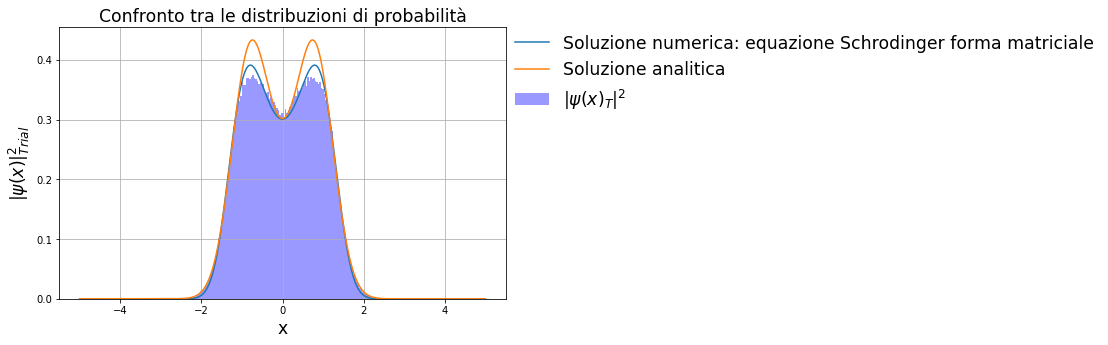

In [2]:
plt.figure(figsize=(8,5))
#Istogramma per la soluzione numerica
psi_T = np.loadtxt("histo_psi.dat", usecols = 0, unpack = True)

#Soluzione analitica utilizzando i valori di mu e sigma ottimizzati trovati numericamente
mu = 0.815      
sigma = 0.631
x = np.linspace(-5, 5, 1000)
norm = 1/(sigma * np.sqrt(2*math.pi))
psi_anal = np.exp((-(x-mu)**2)/(2*sigma**2)) + np.exp((-(x+mu)**2)/(2*sigma**2))

#Soluzione numerica utilizzando la forma matriciale dell'equazione di Schrodinger
def Vpot(x):
    return (x**2 - 2.5)*x**2 
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#Plot
plt.plot(x,(psi[0])**2, label = "Soluzione numerica: equazione Schrodinger forma matriciale")
plt.plot(x, norm*norm*psi_anal*psi_anal, label = "Soluzione analitica")
plt.hist(psi_T, bins="auto", density = True, color='blue',
         alpha=0.4, linewidth = 2, label = "$|\psi(x)_T|^2$")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")

plt.title("Confronto tra le distribuzioni di probabilità", fontsize = "xx-large")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\psi(x)|_{Trial}^2$", fontsize = "xx-large")
plt.grid(True)
plt.show()

### Path Integral MonteCarlo

Grazie alle tecniche di Path Integral MonteCarlo è possibile rappresentare un modello quantistico come uno speciale modello classico, ovvero quello di $N$ polimeri ad anello interagenti tra loro tramite interazione armonica. Le medie quantistiche a temperatura finita possono essere scritte, nella rappresentazione delle coordinate, come 

$$ \langle \hat{O} \rangle = Tr(\hat{\rho}\hat{O}) = Tr(\hat{\rho})^{-1}\int d\vec{r} \rho(\vec{r},\vec{r},\beta)O(\vec{r})$$

dove $\hat{\rho}$ è la _matrice densità_ e 

$$\rho(\vec{r},\vec{r},\beta) = \langle \vec{r}|e^{-\beta\hat{H}}|\vec{r} \rangle$$

Si può scomporre la matrice densità utilizzando una _decomposizione di Trotter_ 

$$e^{-\tau\hat{H}} = (e^{-\frac{\tau}{M}\hat{H}})^M$$

In questo modo la matrice densità si può scrivere in rappresentazione di path integral, e approssimando gli elementi della matrice per alte temperature $\Big(\frac{\beta}{M} \ll 1\Big)$ si ottiene che la media termica può essere valutata tramite integrazione MonteCarlo:

$$\langle \hat{O} \rangle = Tr(\hat{\rho}\hat{O}) \simeq \int d\vec{r_1}...\int d\vec{r_M} \frac{\rho_p\Big(\vec{r_1},\vec{r_2}, \frac{\beta}{M}\Big)...\rho_p\Big(\vec{r_M},\vec{r_1}, \frac{\beta}{M}\Big)}{Tr(\hat{\rho})}O(\vec{r_1}) = \int d\vec{r_1}...\int d\vec{r_M} p(\vec{r_1}...\vec{r_M})O(\vec{r_1}) $$

### Path Integral Ground State

Le tecniche di Path Integral Ground State permettono di valutare i valori d'aspettazione di un operatore relativo ad un ground-state sconosciuto $\Psi_0$; le medie di ground-state ottenute equivalgono a medie canoniche di un sistema classico speciale, ovvero quello di $N$ polimeri interagenti lineari aperti. La simulazione, fatta a $T=0$, utilizza l'evoluzione di tempo immaginario degli stati quantistici: utilizzando l'equazione di evoluzione di uno stato quantistico 

$$\langle \vec{r} | \Psi(t) \rangle = \langle \vec{r} | e^{-\frac{i}{\hbar}t\hat{H}}|\Psi_0 \rangle$$ e operando una rotazione di Wick $t \rightarrow \frac{i}{\hbar}t = \tau$, si può definire il propagatore 

$$G\Big(\vec{r},\vec{r'},\tau\Big) = \langle \vec{r}| e^{-\tau\hat{H}}|\vec{r'} \rangle$$ 

di modo che la funzione d'onda sia data da 

$$\Psi(\vec{r},\tau) = \int d\vec{r'} G\Big(\vec{r},\vec{r'},\tau\Big) \Psi(\vec{r'},0)$$

Grazie alla rotazione di Wick applicata al tempo le quantità $\Psi(\vec{r},\tau)$, $\Psi(\vec{r'},0)$ e $G\Big(\vec{r},\vec{r'},\tau\Big)$ sono reali e positive e possono essere interpretate come densità di probabilità e probabilità di transizione in modo da costruire una catena di Markov tramite algoritmo di Metropolis che converge alle $\Psi(\vec{r},\tau)$ campionate. Per grandi evoluzioni di tempo immaginario, infatti, lo stato quantistico $\Psi(\vec{r},\tau)$ ha una convergenza esponenziale al ground-state del sistema:

$$|\Psi(\tau)\rangle \simeq c_0 e^{-\tau E_0} |\Psi_0\rangle$$

Il ground-state è visto dunque come l'evoluzione a tempo immaginario di uno stato variazionale di prova.

### Esercizio 8.03: QMC

#### Path Integral Ground State

Si studia il sistema quantistico monodimensionale analizzato in precedenza con tecniche di Variational MonteCarlo tramite metodi di Path Integral Ground State. Viene utilizzata come funzione di prova:

- $\Psi(x)_T = 1$, funzione costante
- $\Psi(x)_T^{(\sigma,\mu)}$, funzione trial con i parametri ottimizzati tramite Variational MonteCarlo

Sommando i risultati ottenuti per l'energia cinetica e l'energia potenziale del sistema, si trovano i valori dell'energia totale del sistema:

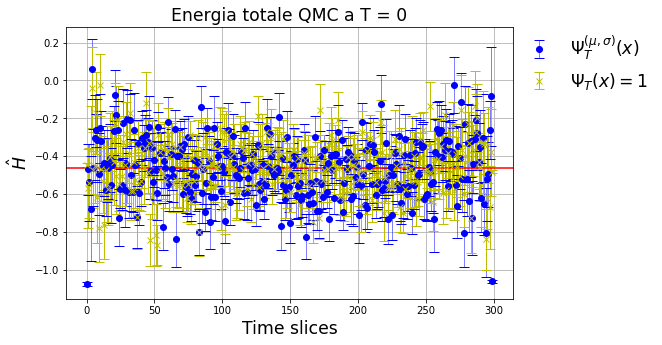

In [38]:
plt.figure(figsize=(8,5))

M, kin, std_kin = np.loadtxt("QMC_pigs/kinetic_pigs.dat", usecols = (0,1,2), unpack = True)
M, pot, std_pot = np.loadtxt("QMC_pigs/potential_pigs.dat", usecols = (0,1,2), unpack = True)

M, kin_cost, std_kin_cost = np.loadtxt("QMC_pigs/kinetic_pigs_cost.dat", usecols = (0,1,2), unpack = True)
M1, pot_cost, std_pot_cost = np.loadtxt("QMC_pigs/potential_pigs_cost.dat", usecols = (0,1,2), unpack = True)


ene = kin + pot
std_ene = std_kin + std_pot

ene_cost = kin_cost + pot_cost
std_ene_cost = std_kin_cost + std_pot_cost

plt.errorbar(M, ene, yerr=std_ene, label = "$\Psi^{(\mu,\sigma)}_T(x)$", fmt = "bo",capsize = 5, elinewidth = 0.5)
plt.errorbar(M, ene_cost, yerr=std_ene_cost, label = "$\Psi_T(x) = 1$", fmt = "yx",capsize = 5, elinewidth = 1)

plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.title("Energia totale QMC a T = 0", fontsize="xx-large")
plt.ylabel("$\hat{H}$", fontsize="xx-large")
plt.xlabel("Time slices", fontsize="xx-large")
plt.axhline(y=-0.46046587969271535,color="red")
plt.grid(True)
plt.show()

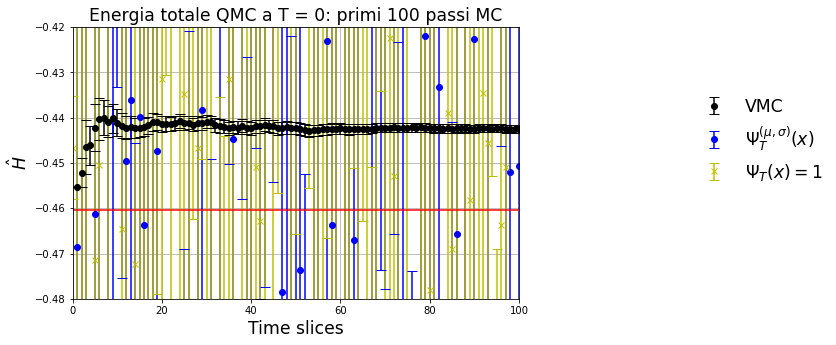

In [39]:
plt.figure(figsize=(8,5))
M1, mean_ene, std = np.loadtxt("mean_ene.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(M1, mean_ene, yerr=std, label = "VMC", fmt = "o", color = "black", capsize = 5)
M, kin, std_kin = np.loadtxt("QMC_pigs/kinetic_pigs.dat", usecols = (0,1,2), unpack = True)
M, pot, std_pot = np.loadtxt("QMC_pigs/potential_pigs.dat", usecols = (0,1,2), unpack = True)

M, kin_cost, std_kin_cost = np.loadtxt("QMC_pigs/kinetic_pigs_cost.dat", usecols = (0,1,2), unpack = True)
M1, pot_cost, std_pot_cost = np.loadtxt("QMC_pigs/potential_pigs_cost.dat", usecols = (0,1,2), unpack = True)


ene = kin + pot
std_ene = std_kin + std_pot

ene_cost = kin_cost + pot_cost
std_ene_cost = std_kin_cost + std_pot_cost

plt.errorbar(M, ene, yerr=std_ene, label = "$\Psi^{(\mu,\sigma)}_T(x)$", fmt = "bo",capsize = 5)
plt.errorbar(M, ene_cost, yerr=std_ene_cost, label = "$\Psi_T(x) = 1$", fmt = "yx",capsize = 5)

plt.legend(bbox_to_anchor=(1.38, 0.4), loc='best', borderaxespad=0.05,frameon = False, fontsize = "xx-large")
plt.title("Energia totale QMC a T = 0: primi 100 passi MC", fontsize="xx-large")
plt.ylabel("$\hat{H}$", fontsize="xx-large")
plt.xlabel("Time slices", fontsize="xx-large")
plt.axhline(y=-0.46046587969271535,color="red")
plt.ylim(-0.48, -0.42)
plt.xlim(0,100)

plt.grid(True)
plt.show()

Come si può notare dal grafico effettuato per i primi 100 passi MC, grazie alle barre d'errore la maggior parte dei valori dell'energia campionata con le tecniche di Path Integral Ground State raggiungono il valore esatto $E_0 = -0,46046587969271535$. Ciò non accade invece per le energie medie calcolate tramite metodo variazionale; esse, infatti, attestandosi attorno ad un valore $E_0 \simeq -0,44$, non riescono mai a raggiungere il valore esatto di ground-state. 

Si confrontano anche i risultati ottenuti per le distribuzioni di probabilità dello stato fondamentale con le due funzioni di prova rispetto al caso variazionale:

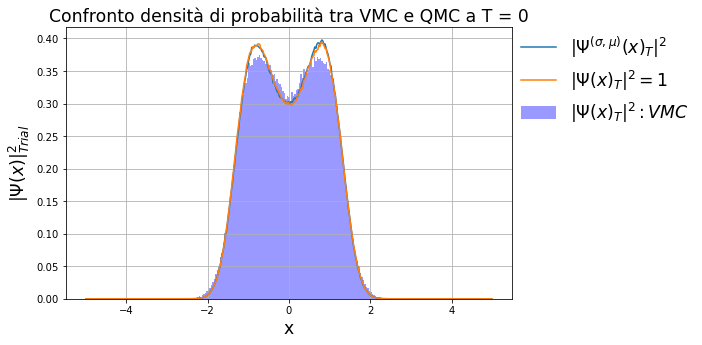

In [40]:
plt.figure(figsize=(8,5))
#Istogramma per la soluzione numerica
psi_T = np.loadtxt("histo_psi.dat", usecols = 0, unpack = True)
x, prob_cost = np.loadtxt("QMC_pigs/probability_pigs_cost.dat", usecols = (0,1), unpack = True)
x, prob = np.loadtxt("QMC_pigs/probability_pigs.dat", usecols = (0,1), unpack = True)
plt.hist(psi_T, bins="auto", density = True, color='blue',
         alpha=0.4, linewidth = 2, label = "$|\Psi(x)_T|^2:VMC$")
plt.plot(x, prob, label = "$|\Psi^{(\sigma, \mu)}(x)_T|^2$")
plt.plot(x, prob_cost,label = "$|\Psi(x)_T|^2=1$")

plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)|_{Trial}^2$", fontsize = "xx-large")
plt.title("Confronto densità di probabilità tra VMC e QMC a T = 0", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")

plt.grid(True)
plt.show()

Riducendo la propagazione del tempo immaginario si può mostrare come, rispetto al caso costante, una funzione d'onda come quella ottimizzata $\Psi_T(x)^{(\sigma,\mu)}$, simile alla funzione di ground state del sistema studiato, dia risultati migliori anche per propagazioni immaginarie piccole. 

La funzione d'onda test costante $\Psi_T(x)_{Cost}$, essendo molto diversa dalla funzione d'onda di ground state del sistema, impiega più tempo a ripulire il risultato dalle sovrapposizioni dovuto alle funzioni d'onda relative a stati ad energia maggiore, pertanto al diminuire della propagazione immaginaria vi è un netto peggioramento del risultato, che si discosta sempre più dalla soluzione numerica $\Psi(x)_{Mat}$ che si troverebbe risolvendo l'equazione di Schrodinger in forma matriciale.

Per quanto anche la funzione ottimizzata peggiori al diminuire della propagazione di tempo immaginario, essa riesce comunque a replicare in modo discreto la funzione di ground state.

Inoltre, al diminuire della propagazione di tempo immaginario, vi è un progressivo aumento degli errori relativi all'energia totale, che si attesta comunque attorno al valor vero.

Utilizzando una funzione d'onda costante non utilizzerei un tempo immaginario inferiore a $\tau = 3.0$, mentre utilizzando una funzione ottimizzata scenderei anche fino a $\tau = 1.0$

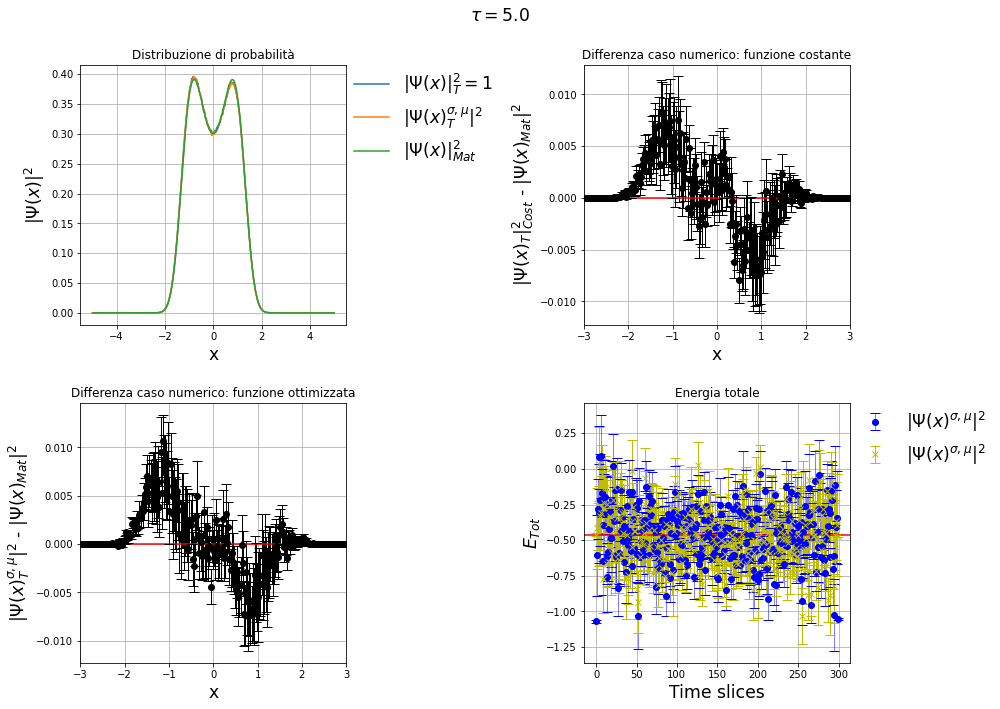

In [6]:
plt.figure(figsize=(14,10))

x, prob, err = np.loadtxt("VarTempo_Costante/probability_5.dat", usecols = (0,1,2), unpack = True)
y, probott, err_ott = np.loadtxt("VarTempo_Ottimizzata/probability_5.dat", usecols = (0,1,2), unpack = True)
M, kin_cost, std_kin_cost = np.loadtxt("VarTempo_Costante/kinetic_5.dat", usecols = (0,1,2), unpack = True)
M, pot_cost, std_pot_cost = np.loadtxt("VarTempo_Costante/potential_5.dat", usecols = (0,1,2), unpack = True)
M, kin, std_kin = np.loadtxt("VarTempo_Ottimizzata/kinetic_5.dat", usecols = (0,1,2), unpack = True)
M, pot, std_pot = np.loadtxt("VarTempo_Ottimizzata/potential_5.dat", usecols = (0,1,2), unpack = True)
#Soluzione numerica utilizzando la forma matriciale dell'equazione di Schrodinger
def Vpot(x):
    return (x**2 - 2.5)*x**2 
hbar = 1
m = 1
a = 10
N = 400 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


ene_cost = kin_cost + pot_cost
std_ene_cost = std_kin_cost + std_pot_cost

ene = kin + pot
std_ene = std_kin + std_pot

plt.subplot(2,2,1)

plt.plot(x, prob, label = "$|\Psi(x)|_T^2=1$")
plt.plot(y, probott, label = "$|\Psi(x)_T^{\sigma,\mu}|^2$")
plt.plot(x,(psi[0])**2, label = "$|\Psi(x)|_{Mat}^2$")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)|^2$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.title("Distribuzione di probabilità")
plt.grid(True)

plt.subplot(2,2,2)

plt.errorbar(x, prob-psi[0]**2, yerr=err, color='black',
     fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione costante")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T|_{Cost}^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,3)

plt.errorbar(x, probott-psi[0]**2, yerr=err_ott, color='black',
     fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione ottimizzata")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T^{\sigma,\mu}|^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,4)

plt.errorbar(M, ene, yerr=std_ene, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "bo",capsize = 5,elinewidth = 0.5)
plt.errorbar(M, ene_cost, yerr=std_ene_cost, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "yx",capsize = 5, elinewidth = 1)
plt.ylabel("$E_{Tot}$", fontsize="xx-large")
plt.xlabel("Time slices", fontsize="xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.axhline(y=-0.46046587969271535,color="red")
plt.title("Energia totale")

plt.suptitle("$\\tau = 5.0$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.grid(True)
plt.show()

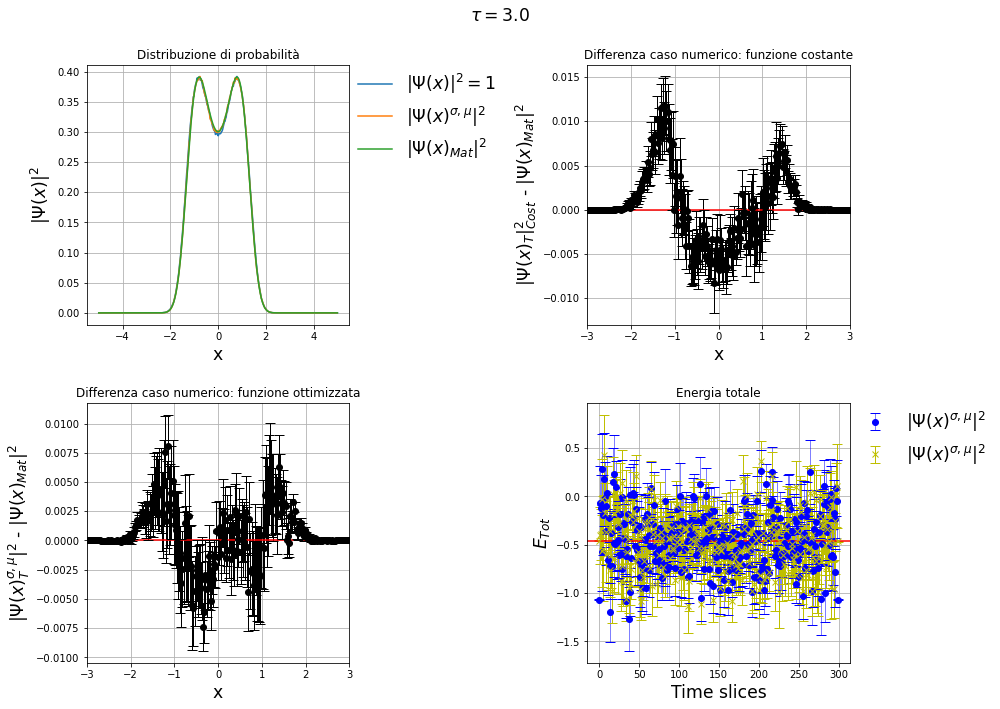

In [7]:
plt.figure(figsize=(14,10))

x, prob = np.loadtxt("VarTempo_Costante/probability_3.dat", usecols = (0,1), unpack = True)
y, probott = np.loadtxt("VarTempo_Ottimizzata/probability_3.dat", usecols = (0,1), unpack = True)
M, kin_cost, std_kin_cost = np.loadtxt("VarTempo_Costante/kinetic_3.dat", usecols = (0,1,2), unpack = True)
M, pot_cost, std_pot_cost = np.loadtxt("VarTempo_Costante/potential_3.dat", usecols = (0,1,2), unpack = True)
M, kin, std_kin = np.loadtxt("VarTempo_Ottimizzata/kinetic_3.dat", usecols = (0,1,2), unpack = True)
M, pot, std_pot = np.loadtxt("VarTempo_Ottimizzata/potential_3.dat", usecols = (0,1,2), unpack = True)
#Soluzione numerica utilizzando la forma matriciale dell'equazione di Schrodinger
def Vpot(x):
    return (x**2 - 2.5)*x**2 
hbar = 1
m = 1
a = 10
N = 400 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


ene_cost = kin_cost + pot_cost
std_ene_cost = std_kin_cost + std_pot_cost

ene = kin + pot
std_ene = std_kin + std_pot

plt.subplot(2,2,1)

plt.plot(x, prob, label = "$|\Psi(x)|^2=1$")
plt.plot(y, probott, label = "$|\Psi(x)^{\sigma,\mu}|^2$")
plt.plot(x,(psi[0])**2, label = "$|\Psi(x)_{Mat}|^2$")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)|^2$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.title("Distribuzione di probabilità")
plt.grid(True)

plt.subplot(2,2,2)

plt.errorbar(x, prob-psi[0]**2, yerr=err, color='black',
    fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione costante")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T|_{Cost}^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,3)

plt.errorbar(x, probott-psi[0]**2, yerr=err_ott, color='black',
    fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione ottimizzata")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T^{\sigma,\mu}|^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,4)

plt.errorbar(M, ene, yerr=std_ene, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "bo",capsize = 5,elinewidth = 0.5)
plt.errorbar(M, ene_cost, yerr=std_ene_cost, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "yx",capsize = 5, elinewidth = 1)
plt.ylabel("$E_{Tot}$", fontsize="xx-large")
plt.xlabel("Time slices", fontsize="xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.axhline(y=-0.46046587969271535,color="red")
plt.title("Energia totale")
plt.grid(True)

plt.suptitle("$\\tau = 3.0$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()

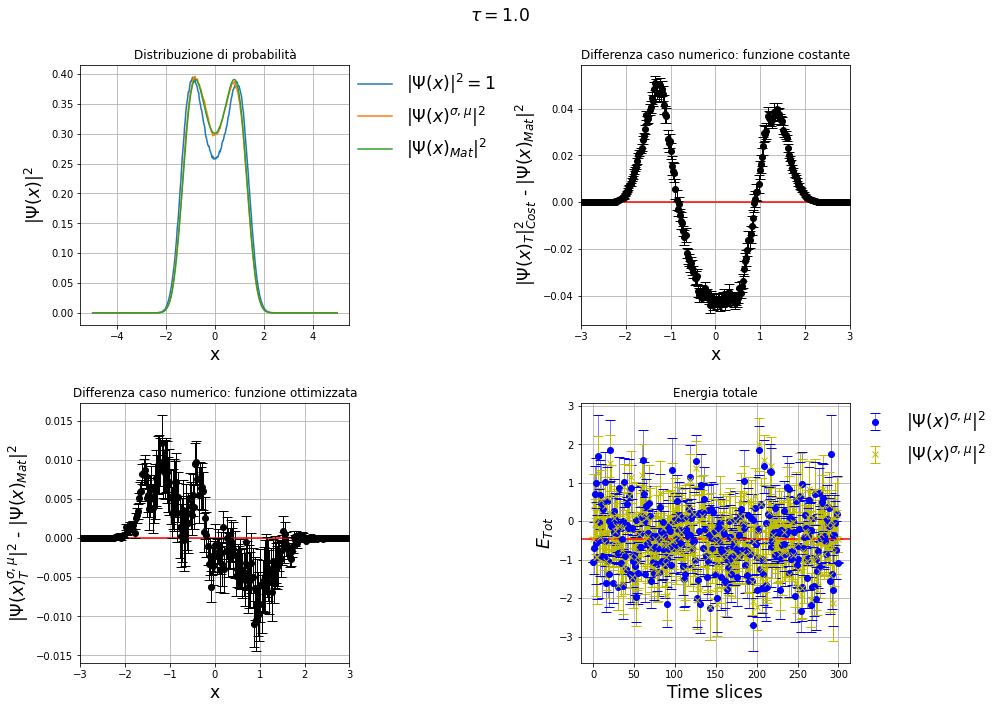

In [8]:
plt.figure(figsize=(14,10))

x, prob = np.loadtxt("VarTempo_Costante/probability_1.dat", usecols = (0,1), unpack = True)
y, probott = np.loadtxt("VarTempo_Ottimizzata/probability_1.dat", usecols = (0,1), unpack = True)
M, kin_cost, std_kin_cost = np.loadtxt("VarTempo_Costante/kinetic_1.dat", usecols = (0,1,2), unpack = True)
M, pot_cost, std_pot_cost = np.loadtxt("VarTempo_Costante/potential_1.dat", usecols = (0,1,2), unpack = True)
M, kin, std_kin = np.loadtxt("VarTempo_Ottimizzata/kinetic_1.dat", usecols = (0,1,2), unpack = True)
M, pot, std_pot = np.loadtxt("VarTempo_Ottimizzata/potential_1.dat", usecols = (0,1,2), unpack = True)
#Soluzione numerica utilizzando la forma matriciale dell'equazione di Schrodinger
def Vpot(x):
    return (x**2 - 2.5)*x**2 
hbar = 1
m = 1
a = 10
N = 400 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


ene_cost = kin_cost + pot_cost
std_ene_cost = std_kin_cost + std_pot_cost

ene = kin + pot
std_ene = std_kin + std_pot

plt.subplot(2,2,1)

plt.plot(x, prob, label = "$|\Psi(x)|^2=1$")
plt.plot(y, probott, label = "$|\Psi(x)^{\sigma,\mu}|^2$")
plt.plot(x,(psi[0])**2, label = "$|\Psi(x)_{Mat}|^2$")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)|^2$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.title("Distribuzione di probabilità")
plt.grid(True)

plt.subplot(2,2,2)

plt.errorbar(x, prob-psi[0]**2, yerr=err, color='black',
    fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione costante")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T|_{Cost}^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')


plt.subplot(2,2,3)

plt.errorbar(x, probott-psi[0]**2, yerr=err_ott, color='black',
    fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione ottimizzata")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T^{\sigma,\mu}|^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,4)

plt.errorbar(M, ene, yerr=std_ene, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "bo",capsize = 5,elinewidth = 0.5)
plt.errorbar(M, ene_cost, yerr=std_ene_cost, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "yx",capsize = 5, elinewidth = 1)
plt.ylabel("$E_{Tot}$", fontsize="xx-large")
plt.xlabel("Time slices", fontsize="xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.axhline(y=-0.46046587969271535,color="red")
plt.title("Energia totale")
plt.grid(True)

plt.suptitle("$\\tau = 1.0$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()

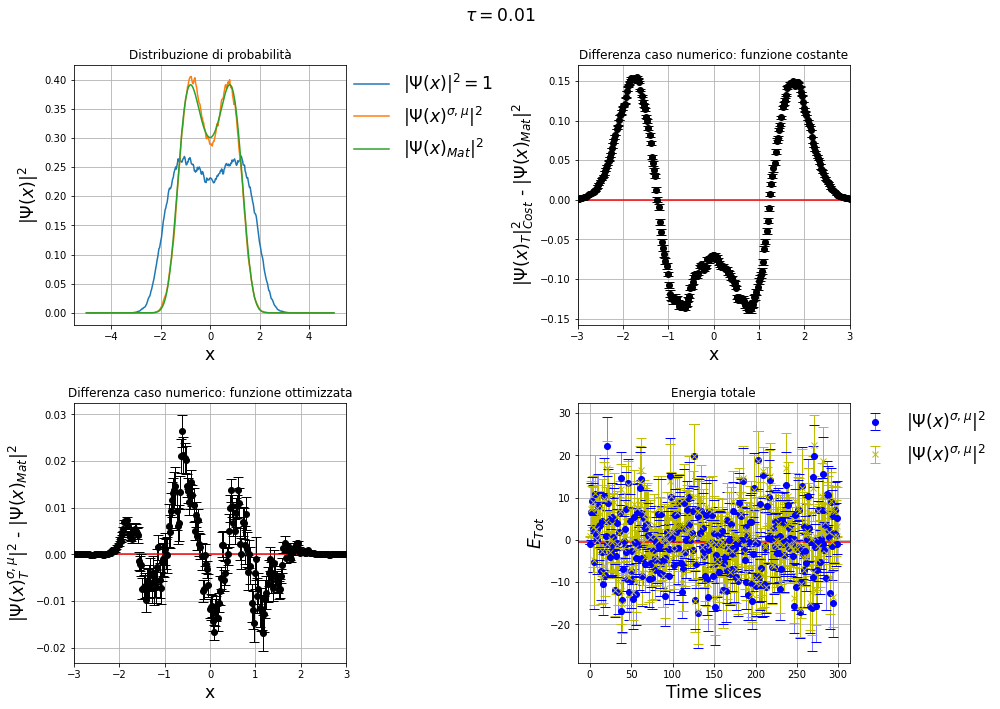

In [9]:
plt.figure(figsize=(14,10))

x, prob = np.loadtxt("VarTempo_Costante/probability_01.dat", usecols = (0,1), unpack = True)
y, probott = np.loadtxt("VarTempo_Ottimizzata/probability_01.dat", usecols = (0,1), unpack = True)
M, kin_cost, std_kin_cost = np.loadtxt("VarTempo_Costante/kinetic_01.dat", usecols = (0,1,2), unpack = True)
M, pot_cost, std_pot_cost = np.loadtxt("VarTempo_Costante/potential_01.dat", usecols = (0,1,2), unpack = True)
M, kin, std_kin = np.loadtxt("VarTempo_Ottimizzata/kinetic_01.dat", usecols = (0,1,2), unpack = True)
M, pot, std_pot = np.loadtxt("VarTempo_Ottimizzata/potential_01.dat", usecols = (0,1,2), unpack = True)
#Soluzione numerica utilizzando la forma matriciale dell'equazione di Schrodinger
def Vpot(x):
    return (x**2 - 2.5)*x**2 
hbar = 1
m = 1
a = 10
N = 400 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

ene_cost = kin_cost + pot_cost
std_ene_cost = std_kin_cost + std_pot_cost

ene = kin + pot
std_ene = std_kin + std_pot

plt.subplot(2,2,1)

plt.plot(x, prob, label = "$|\Psi(x)|^2=1$")
plt.plot(y, probott, label = "$|\Psi(x)^{\sigma,\mu}|^2$")
plt.plot(x,(psi[0])**2, label = "$|\Psi(x)_{Mat}|^2$")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)|^2$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.title("Distribuzione di probabilità")
plt.grid(True)

plt.subplot(2,2,2)

plt.errorbar(x, prob-psi[0]**2, yerr=err, color='black',
    fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione costante")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T|_{Cost}^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,3)

plt.errorbar(x, probott-psi[0]**2, yerr=err_ott, color='black',
   fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione ottimizzata")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T^{\sigma,\mu}|^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,4)

plt.errorbar(M, ene, yerr=std_ene, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "bo",capsize = 5,elinewidth = 0.5)
plt.errorbar(M, ene_cost, yerr=std_ene_cost, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "yx",capsize = 5, elinewidth = 1)
plt.ylabel("$E_{Tot}$", fontsize="xx-large")
plt.xlabel("Time slices", fontsize="xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.axhline(y=-0.46046587969271535,color="red")
plt.title("Energia totale")
plt.grid(True)

plt.suptitle("$\\tau = 0.01$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()

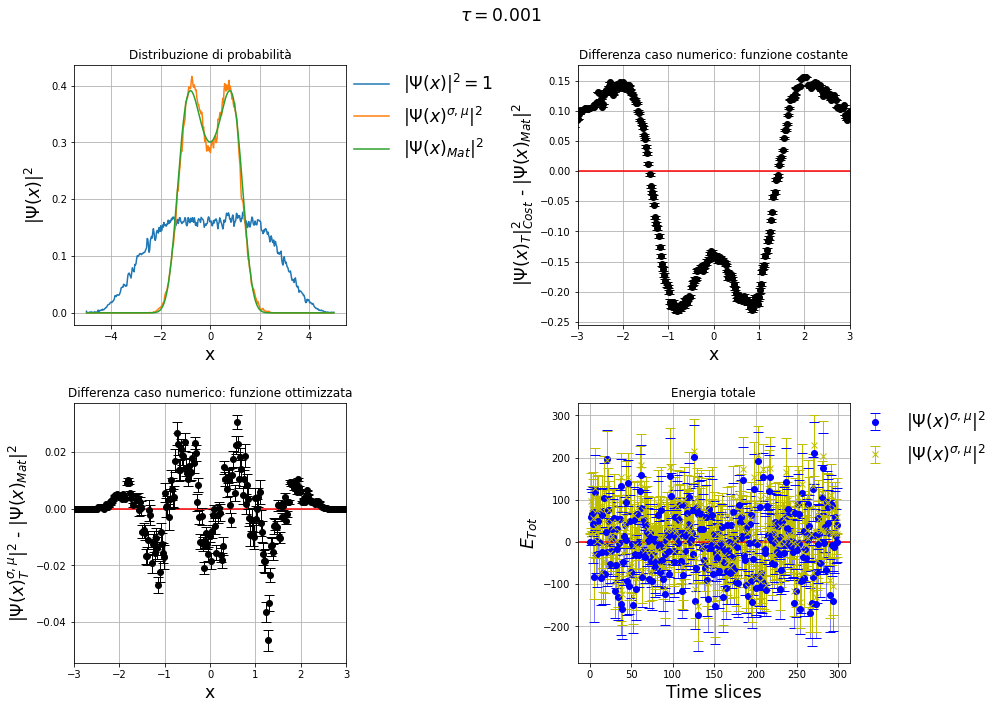

In [10]:
plt.figure(figsize=(14,10))

x, prob = np.loadtxt("VarTempo_Costante/probability_001.dat", usecols = (0,1), unpack = True)
y, probott = np.loadtxt("VarTempo_Ottimizzata/probability_001.dat", usecols = (0,1), unpack = True)
M, kin_cost, std_kin_cost = np.loadtxt("VarTempo_Costante/kinetic_001.dat", usecols = (0,1,2), unpack = True)
M, pot_cost, std_pot_cost = np.loadtxt("VarTempo_Costante/potential_001.dat", usecols = (0,1,2), unpack = True)
M, kin, std_kin = np.loadtxt("VarTempo_Ottimizzata/kinetic_001.dat", usecols = (0,1,2), unpack = True)
M, pot, std_pot = np.loadtxt("VarTempo_Ottimizzata/potential_001.dat", usecols = (0,1,2), unpack = True)
#Soluzione numerica utilizzando la forma matriciale dell'equazione di Schrodinger
def Vpot(x):
    return (x**2 - 2.5)*x**2 
hbar = 1
m = 1
a = 10
N = 400 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

ene_cost = kin_cost + pot_cost
std_ene_cost = std_kin_cost + std_pot_cost

ene = kin + pot
std_ene = std_kin + std_pot

plt.subplot(2,2,1)

plt.plot(x, prob, label = "$|\Psi(x)|^2=1$")
plt.plot(y, probott, label = "$|\Psi(x)^{\sigma,\mu}|^2$")
plt.plot(x,(psi[0])**2, label = "$|\Psi(x)_{Mat}|^2$")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)|^2$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.title("Distribuzione di probabilità")
plt.grid(True)

plt.subplot(2,2,2)

plt.errorbar(x, prob-psi[0]**2, yerr=err, color='black',
    fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione costante")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T|_{Cost}^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')


plt.subplot(2,2,3)

plt.errorbar(x, probott-psi[0]**2, yerr=err_ott, color='black',
    fmt = "o", capsize = 5, elinewidth = 1
);
scale = 0.3
plt.title("Differenza caso numerico: funzione ottimizzata")
plt.xlabel("x", fontsize = "xx-large")
plt.ylabel("$|\Psi(x)_T^{\sigma,\mu}|^2$ - $|\Psi(x)_{Mat}|^2$", fontsize = "xx-large")
plt.grid(True)
plt.xlim((-3,3))
plt.hlines(0, -3, 3, color = 'red')

plt.subplot(2,2,4)

plt.errorbar(M, ene, yerr=std_ene, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "bo",capsize = 5,elinewidth = 0.5)
plt.errorbar(M, ene_cost, yerr=std_ene_cost, label = "$|\Psi(x)^{\sigma,\mu}|^2$",fmt = "yx",capsize = 5, elinewidth = 1)
plt.ylabel("$E_{Tot}$", fontsize="xx-large")
plt.xlabel("Time slices", fontsize="xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.axhline(y=-0.46046587969271535,color="red")
plt.title("Energia totale")
plt.grid(True)

plt.suptitle("$\\tau = 0.001$", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()

#### Path Integral MonteCarlo

Si svolge una simulazione a $T=1,25$ utilizzando un metodo di Path Integral MonteCarlo per studiare la distribuzione di probabilità ottenuta. Si utilizzano due funzioni di prova:

- $\Psi(x)_T = 1$, funzione costante
- $\Psi(x)_T^{(\sigma,\mu)}$, funzione trial con i parametri ottimizzati tramite Variational MonteCarlo

I risultati ottenuti vengono confrontati con quelli ottenuti nel caso di Path Integral Ground State e con i risultati analitici.

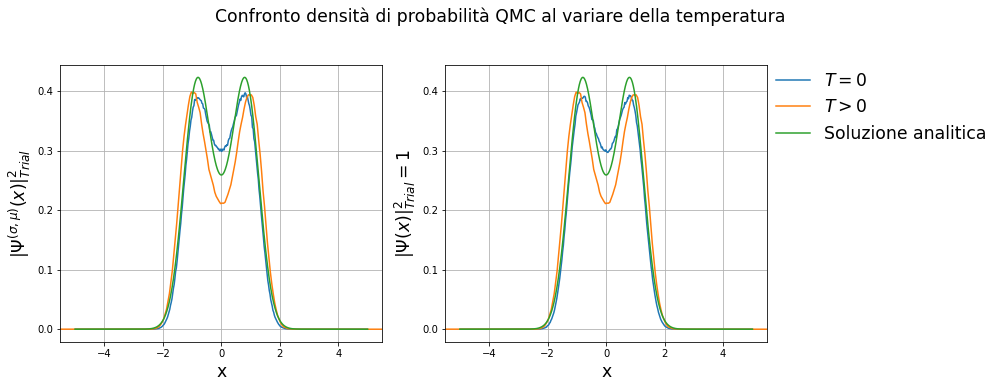

In [50]:
plt.figure(figsize=(14,10))

x, prob = np.loadtxt("QMC_pigs/probability_pigs.dat", usecols = (0,1), unpack = True)
z, prob_pimc = np.loadtxt("QMC_pimc/probability_pimc.dat", usecols = (0,1), unpack = True)
x, prob_cost = np.loadtxt("QMC_pigs/probability_pigs_cost.dat", usecols = (0,1), unpack = True)
z, prob_pimc_cost = np.loadtxt("QMC_pimc/probability_pimc_cost.dat", usecols = (0,1), unpack = True)
#Soluzione analitica utilizzando i valori di mu e sigma ottimizzati trovati numericamente
mu = 0.851      
sigma = 0.631
y = np.linspace(-5, 5, 1000)
norm = 1/(sigma * np.sqrt(2*math.pi))
psi_anal = np.exp((-(y-mu)**2)/(2*sigma**2)) + np.exp((-(y+mu)**2)/(2*sigma**2))

plt.subplot(2,2,1)
plt.plot(x, prob, label = "$T=0$")
plt.plot(z,prob_pimc, label = "$T>0$")
plt.plot(y, norm*norm*psi_anal*psi_anal, label = "Soluzione analitica")
plt.xlabel("x", fontsize = "xx-large")
plt.xlim(-5.5,5.5)
plt.ylabel("$|\Psi^{(\sigma,\mu)}(x)|_{Trial}^2$", fontsize = "xx-large")
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(x, prob_cost,label = "$T=0$")
plt.plot(z,prob_pimc_cost, label = "$T>0$")
plt.plot(y, norm*norm*psi_anal*psi_anal, label = "Soluzione analitica")
plt.xlabel("x", fontsize = "xx-large")
plt.xlim(-5.5,5.5)
plt.ylabel("$|\Psi(x)|_{Trial}^2=1$", fontsize = "xx-large")
plt.grid(True)

plt.suptitle("Confronto densità di probabilità QMC al variare della temperatura", fontsize = "xx-large")
plt.legend(bbox_to_anchor=(1.005, 1.), loc='best', borderaxespad=0.,frameon = False, fontsize = "xx-large")

plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()

Ad una temperatura diversa da zero iniziano a popolarsi anche gli stati ad energia maggiore, pertanto lo stato trovato è una combinazione del ground state con i primi stati eccitati.